**Lesson 12 - Text wrangling**

Text wrangling is a process that consists of a series of steps to wrangle, clean and standarize textual data into a form that could be consumed by other NLP and intelligent systems.

Techniques for preprocessing include cleaning text, tokenizing text, removing special characters, case conversion, correcting spelling, removing stopwords and other unnecessary terms, stemming, and lemmatization. 

Discuss various techniques to remove unnecessary content from one or more text documents in a corpus (or corpora) and get clean text documents.

1. Remove html tags
1. Sentence Tokenization
1. Word Tokenization
1. Remove accented characters
1. Expanding Contractions
1. Case conversions
1. Text corrections
1. Stemming
1. Lemmatization
1. Remove stopwords

In [1]:
%run setup.ipynb

## 1. Remove html tags

Web scraping technique often adds noise to the text. Try to extract meaningful textual content from the data extracted from the web.

Let's consider a web page showing the King James version of the Bible. Use the `requests` module to make HTTP requests.

In [2]:
import requests

data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.content
print(content[1163:2200])

b"\n    }\r\nbody > p {\r\n    /* paras at <body> level - not in <div> or <table>  */\r\n    text-align: justify;\r\n    /* or left?? */\r\n    text-indent: 1em;\r\n    /* first-line indent */\r\n    }\r\n/* suppress indentation on paragraphs following heads  */\r\nh2 + p, h3 + p, h4 + p {\r\n    text-indent: 0\r\n    }\r\n/* tighter spacing for list item paragraphs */\r\ndd, li {\r\n    margin-top: 0.25em;\r\n    margin-bottom: 0;\r\n    line-height: 1.2em;\r\n    /* a bit closer than p's */\r\n    }\r\n/* ************************************************************************\r\n * Head 2 is for chapter heads. \r\n * ********************************************************************** */\r\nh2 {\r\n    /* text-align:center;  left-aligned by default. */\r\n    margin-top: 3em;\r\n    /* extra space above.. */\r\n    margin-bottom: 2em;\r\n    /* ..and below */\r\n    clear: both;\r\n    /* don't let sidebars overlap */\r\n    }\r\n/* ************************************************

Use the `Beautiful Soup` package for parsing HTML documents.

In [3]:
import re
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

clean_content = strip_html_tags(content)
print(clean_content[1163:2045])

d of schedule]
[This file was first posted on June 7, 2003]
Edition: 10
Language: English
*** START OF THE PROJECT GUTENBERG EBOOK, THE BIBLE, KING JAMES, BOOK 1***
This eBook was produced by David Widger
with the help of Derek Andrew's text from January 1992
and the work of Bryan Taylor in November 2002.
Book 01        Genesis
01:001:001 In the beginning God created the heaven and the earth.
01:001:002 And the earth was without form, and void; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.
01:001:003 And God said, Let there be light: and there was light.
01:001:004 And God saw the light, that it was good: and God divided the
           light from the darkness.
01:001:005 And God called the light Day, and the darkness he called
           Night. And the evening and the morning were the first day


## 2. Sentence tokenization

Sentence tokenization is the process of splitting a text corpus into sentences that act as the first level of tokens the corpus is comprised of. This is also known as sentence segmentation, because we try to segement the text into meaningful sentences.

There are various ways to perform sentence tokenization, including considering specific delimiters between sentences. Furthermore, nltk provides various interfaces for performing sentence tokenization.

Let's focus on the following sentence tokenizers:
* sent_tokenize
* pretrained sentence tokenization models
* PunktSentenceTokenizer
* RegexpTokenizer

To tokenize some sentences, text is necessary. 

Load sample text (just a string) and the Gutenberg corpus available in nltk by using the `gutenberg` module that includes a selection of texts available in the `Gutenberg` electronic text archive (containing some 25,000 free electronic books hosted at http://www.gutemberg.org/). 

You can see the file idenfifiers available in this Gutenberg corpus by using the `fileids()` function.

In [4]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

gutenberg.fileids() 

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Elisabetta\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Let's consider `Alice in Wonderland` by Carroll as text corpus. 

In [5]:
alice = gutenberg.raw(fileids='carroll-alice.txt')
alice

'[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is the use of a book,\' thought Alice \'without pictures or\nconversation?\'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, \'Oh dear!\nOh dear! I shall be late!\' (when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the time\nit al

Determine the length of the `Alice in Wonderland` corpus.

In [6]:
len(alice)

144395

Show the first 100 characters in the corpus.

In [7]:
alice[0:100]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

Define a sample text. 

In [8]:
sample_text = ("US unveils world's most powerful supercomputer, beats China. " 
               "The US has unveiled the world's most powerful supercomputer called 'Summit', " 
               "beating the previous record-holder China's Sunway TaihuLight. With a peak performance "
               "of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, "
               "which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, "
               "which reportedly take up the size of two tennis courts.")
sample_text

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

### Default sentence tokenizer

The `nltk.sent_tokenize()` function is the default function that `nltk` recommends and it uses an instance of the PunktSentenceTokenizer class, that is the pre-trained on several language models and works well on many languages besides English. 

Apply this function on our text samples. 

In [9]:
#from pprint import pprint
import numpy as np
nltk.download('punkt')

default_st = nltk.sent_tokenize

alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)

print('\nTotal sentences in alice:', len(alice_sentences))
print('First 5 sentences in alice:-')
print(np.array(alice_sentences[0:5]))

print('Total sentences in sample_text:', len(sample_sentences))
print('Sample text sentences :-')
print(np.array(sample_sentences))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elisabetta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Total sentences in alice: 1625
First 5 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"
 'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.'
 "There was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, 'Oh dear!"
 'Oh dear!']
Total sentences in sample_text: 4
Sample text sentences :-
["US unveils world

This is total number of sentences and what those sentences look like in the text corpora. 

**Note**: the tokenizer uses not only periods to delimit sentences, but also considers other punctuaction and capitalization words.

Let's do some basic frequency analysis on our corpus now. Suppose we wanted to visualize the overall distribution of typical sentence or line lengths across your text. We can do that by computing the length of each sentence and then visualize this using a histogram.

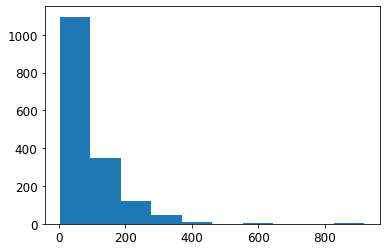

In [10]:
line1_lengths = [len(sentence) for sentence in np.array(alice_sentences)]

plt.hist(line1_lengths)
plt.show()

It looks like most of the sentences are less than 100 characters. 

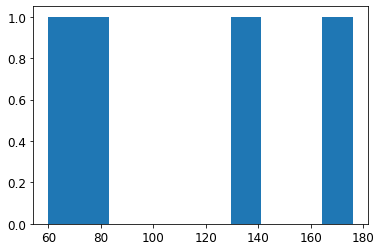

In [11]:
line2_lengths = [len(sentence) for sentence in sample_sentences]

plt.hist(line2_lengths)
plt.show()

### Other languages sentence tokenization

It is possible to tokenize text of other languages using some pretrained models present in `nltk`. Suppose we are interested in German text. We can use `sent_tokenize` that is already trained, or load a pretrained tokenization model on German text into a PunktSentenceTokenizer instance and perform the same operation.

You can load German text corpus by using `europarl_raw` module. 

In [12]:
nltk.download('europarl_raw')
from nltk.corpus import europarl_raw

europarl_raw.german.fileids()

[nltk_data] Downloading package europarl_raw to
[nltk_data]     C:\Users\Elisabetta\AppData\Roaming\nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!


['ep-00-01-17.de',
 'ep-00-01-18.de',
 'ep-00-01-19.de',
 'ep-00-01-20.de',
 'ep-00-01-21.de',
 'ep-00-02-02.de',
 'ep-00-02-03.de',
 'ep-00-02-14.de',
 'ep-00-02-15.de',
 'ep-00-02-16.de']

In [13]:
german_text = europarl_raw.german.raw(fileids='ep-00-01-17.de')
# Total characters in the corpus
print(len(german_text))
# First 100 characters in the corpus
print(german_text[0:100])

157171
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit


We tokenize the text corpus into sentences using the default `sent_tokenize` tokenizer and a pretrained German language tokenizer by loading it from the `nltk` resources. 

In [14]:
# default sentence tokenizer 
german_sentences_def = default_st(text=german_text, language='german')

# loading german text tokenizer into a PunktSentenceTokenizer instance  
german_tokenizer = nltk.data.load(resource_url='tokenizers/punkt/german.pickle')
german_sentences = german_tokenizer.tokenize(german_text)

Verify the type of `german_tokenizer` that should be `PunktSentenceTokenizer`.

In [15]:
print(type(german_tokenizer))

<class 'nltk.tokenize.punkt.PunktSentenceTokenizer'>


`german_tokenizer` specializes in German language. 

Check if results of both tokenizers match.

In [16]:
print(german_sentences_def == german_sentences)

True


The sentences obtained from the default tokenizer are the same as the sentences obtained by this tokenizer.

In [17]:
# print first 5 sentences of the corpus
print(np.array(german_sentences[:5]))

[' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .'
 'Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .'
 'Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .'
 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .'
 'Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .']


### Using PunktSentenceTokenizer for sentence tokenization

In [18]:
punkt_st = nltk.tokenize.PunktSentenceTokenizer()
sample_sentences = punkt_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


### Using RegexpTokenizer for sentence tokenization

`RegexpTokenizer` tokenizes text into sentences, where we will use specific regular expression-based patterns to segment sentences. The following snippet shows how to use a regex pattern to tokenize sentences.

In [19]:
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'
regex_st = nltk.tokenize.RegexpTokenizer(
            pattern=SENTENCE_TOKENS_PATTERN,
            gaps=True)
sample_sentences = regex_st.tokenize(sample_text)
print(np.array(sample_sentences)) 

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


This output shows that we obtained the same sentences as we had obtained using the other tokenizers. 

## 3. Word Tokenization

### Default word tokenizer

The `nltk.word_tokenize()` function is the default and recommended word tokenizer. This tokenizer is an instance or object of the `TreebankWordTokenizer` class.

In [20]:
default_wt = nltk.word_tokenize
words = default_wt(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

### Treebank word tokenizer

The `TreebanlWordTokenizer` is baed on the Penn Treebank and uses various regular expressions to tokenize the text. Once performed sentence tokenization it is possible to apply word tokenization.

Some of the main features of this tokenizer are mentioned here:
* splits and separates out periods that appear at the end of a sentence
* splits and separates commas and single quotes when followed by whitespace
* most punctuaction characters are split and separated into indenedent values
* splits words with standard contractions, such as don't to do and n't

In [21]:
treebank_wt = nltk.TreebankWordTokenizer()
words = treebank_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

The output is similar to `word_tokenize()`.

### TokTok Word Tokenizer 

`TokTokTokenizer` is a newer tokenizers present in the `nltk.tokenize.toktok` module. The tok tok tokenizer is a general tokenizer, where it assumes that the input has one sentence per line. Only the final period is tokenized. However, we can remove the other periods from the words using regular expressions. This tokenizer shows good results for English, Persian, Russian< Czech, French, German, Vietnamese and other languages.

In [22]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
words = tokenizer.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating',
       'the', 'previous', 'record-holder', 'China', "'", 's', 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

### Regexp word tokenizer

`RegexpTokenizer` is useful to use regular expressions. Useful parameters are:
* regex `pattern` for building the tokenizer
* `gaps` for identifying the gaps between the tokens when it sets to `True`, otherwise for finding tokens

First use patterns to identify tokens themselves (`gaps` is `False`).

In [23]:
TOKEN_PATTERN = r'\w+'        
regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN,
                                gaps=False)
words = regex_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', 's', 'most', 'powerful', 'supercomputer',
       'beats', 'China', 'The', 'US', 'has', 'unveiled', 'the', 'world',
       's', 'most', 'powerful', 'supercomputer', 'called', 'Summit',
       'beating', 'the', 'previous', 'record', 'holder', 'China', 's',
       'Sunway', 'TaihuLight', 'With', 'a', 'peak', 'performance', 'of',
       '200', '000', 'trillion', 'calculations', 'per', 'second', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       'which', 'is', 'capable', 'of', '93', '000', 'trillion',
       'calculations', 'per', 'second', 'Summit', 'has', '4', '608',
       'servers', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts'], dtype='<U13')

First use patterns to identify tokens by using `gaps` between tokens (`gaps` is `True`).

In [24]:
GAP_PATTERN = r'\s+'        
regex_wt = nltk.RegexpTokenizer(pattern=GAP_PATTERN,
                                gaps=True)
words = regex_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit',", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

There are multiple ways of obtaining the same results leveraging token patterns themselves or gap patterns. Below you can determine the token boundaries for each token during the tokenize operation. The `span_tokenize` function identifies the tokens using integer offsets `(start_i, end_i)`, where `sample_text[start_i:end_i]` is the corresponding token.

In [25]:
word_indices = list(regex_wt.span_tokenize(sample_text))
print(word_indices)
print(np.array([sample_text[start:end] for start, end in word_indices]))

[(0, 2), (3, 10), (11, 18), (19, 23), (24, 32), (33, 47), (48, 53), (54, 60), (61, 64), (65, 67), (68, 71), (72, 80), (81, 84), (85, 92), (93, 97), (98, 106), (107, 120), (121, 127), (128, 137), (138, 145), (146, 149), (150, 158), (159, 172), (173, 180), (181, 187), (188, 199), (200, 204), (205, 206), (207, 211), (212, 223), (224, 226), (227, 234), (235, 243), (244, 256), (257, 260), (261, 268), (269, 271), (272, 274), (275, 279), (280, 285), (286, 288), (289, 293), (294, 296), (297, 303), (304, 315), (316, 321), (322, 324), (325, 332), (333, 335), (336, 342), (343, 351), (352, 364), (365, 368), (369, 376), (377, 383), (384, 387), (388, 393), (394, 402), (403, 408), (409, 419), (420, 424), (425, 427), (428, 431), (432, 436), (437, 439), (440, 443), (444, 450), (451, 458)]
['US' 'unveils' "world's" 'most' 'powerful' 'supercomputer,' 'beats'
 'China.' 'The' 'US' 'has' 'unveiled' 'the' "world's" 'most' 'powerful'
 'supercomputer' 'called' "'Summit'," 'beating' 'the' 'previous'
 'record-ho

### Derived regex tokenizers

Besides the base `RegexpTokenizer` class, there are several derived classes that perform different types of word tokenization. The `WordPunctTokenizer` extracts the tokens from string of words or sentences in the form of Alphabetic and Non-Alphabetic character by using the pattern `r'\w+|[^\w\s]+'`.

In [26]:
wordpunkt_wt = nltk.WordPunctTokenizer()
words = wordpunkt_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "',", 'beating', 'the',
       'previous', 'record', '-', 'holder', 'China', "'", 's', 'Sunway',
       'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of', '200',
       ',', '000', 'trillion', 'calculations', 'per', 'second', ',', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       ',', 'which', 'is', 'capable', 'of', '93', ',', '000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4', ',',
       '608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

The `WhitespaceTokenizer` extracts the tokens from string of words or sentences without whitespaces, new line and tabs.

In [27]:
whitespace_wt = nltk.WhitespaceTokenizer()
words = whitespace_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit',", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

### Building Tokenizers with NLTK

For a typical NLP pipeline, it is recommendable to build a custom function to perform both sentence- and word-level tokenization. A simple example is depicted in the following snippets. We start with looking at how we can leverage NLTK.

In [28]:
def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences] 
    return word_tokens

sents = tokenize_text(sample_text)
np.array(sents, dtype=object)

array([list(['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.']),
       list(['The', 'US', 'has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the', 'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight', '.']),
       list(['With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.']),
       list(['Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.'])],
      dtype=object)

We can also get to the level of word-level tokenization by leveraging list comprehensions, as depicted in the following code.

In [29]:
words = [word for sentence in sents for word in sentence]
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

## 4. Removing Accented Characters

Usually you might be dealing with accented characters/letters, especially if you only want to analyze the English language. We need to make sure that these characters are converted and standardized into ASCII characters. 

Below there is an example that converts `ě` in `e` and `ó` in `o`. 

In [30]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

You have easily converted special characters to normal English characters, which helps stardardize the words in our corpus.

## 5. Expanding Contractions

Contractions are shortened versions of words or syllables. These exists in written and spoken forms.

Contractions pose a problem for NLP and text analytics because:
* there is a special apostrophe character in the word
* there are two or more words represented by a cotnraction 

There should be some definite proces for dealing with contractions when processing text. You can have a proper mapping for contractions and their corresponding expansions and then use that to expand all the contractions in your text. For example, you can create a vocabulary for contractions and their corresponding expanded forms. Some contractions can have multiple forms, such the contraction `you'll` can be `you will` or `you shall`.

### Exercise

Define a dictionary `CONTRACTION_MAP`, save it in a `json` file and be able to load its content whenever necessary.

Example of CONTRACTION_MAP dictionary:

```py
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    # added other contractions
}
```

To expand contractions, the following code can be used.

```py
from contractions import CONTRACTION_MAP
import re
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
```

The `expanded_match` function inside the main `expand_contractions` function finds each contraction that matches the regex pattern we create out of all the contractions in our `CONTRACTION_MAP` dictionary. Then,  we substitute it with its corresponding expanded version and retain the correct case of the word. 

```py
expand_contractions("Y'all can't expand contractions I'd think")
```

## 6. Removing Special Characters

Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters, that represent extra noise in unstructured text. Usually simple regular expressions (regexes) can be used to remove them.

In [31]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

## 7. Case conversion

You can modify the case of words or sentences to make things easier, like matching specific words or token. 
* lower case and upper case conversions are used a lot, where a body oftext is converted completely to lowercase (all the letters of the text are small letters) or uppercase (all the letters of the text are all capitalized).
* sentence case or title case (the first letter of each word in the sentence is capitalized).

In [32]:
text = 'The quick brown fox jumped over The Big Dog'
text.lower()

'the quick brown fox jumped over the big dog'

In [33]:
text.upper()

'THE QUICK BROWN FOX JUMPED OVER THE BIG DOG'

In [34]:
text.title()

'The Quick Brown Fox Jumped Over The Big Dog'

## 8. Text Correction

One of the main challenges faced in text wrangling is the presence of incorrect words in the text. The definition of incorrect covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance. For example, the word `finally` could be mistakenly written as `fianlly` or someone expressing intense emotion could write it as `finalllllyyyyyy`. The main objective here is to standardize different forms of these words to the correct form so that we do not end up losing vital information from different tokens in the text. We cover dealing with repeated characters. For correcting spellings look at http://norvig.com/spell-correct.html.

### Correcting repeating characters

We just mentioned words that often contain several repeating characters that could be due to incorrect spellings, slang language, or even people wanting to express strong emotions. We show a method here that uses a combination of syntax and semantics to correct these words. We start by correcting the syntax of these words and then move on to semantics.

The first step in our algorithm is to identify repeated characters in a word using a regex pattern and then use a substitution to remove the characters one by one. Let’s consider the word `finalllyyy` from the earlier example. The pattern `r'(\w*)(\w)\2(\w*)` can be used to identify characters that occur twice among other characters in the word. In each step, we try to eliminate one of the repeated characters using a substitution for the match by utilizing the regex match groups (groups 1, 2, and 3) using the pattern `r'\1\2\3'`. Then we keep iterating through this process until no repeated characters remain. The following snippet illustrates this process.

In [35]:
old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_substitution = r'\1\2\3'
step = 1

while True:
    # remove one repeated character
    new_word = repeat_pattern.sub(match_substitution,
                                  old_word)
    if new_word != old_word:
         print('Step: {} Word: {}'.format(step, new_word))
         step += 1 # update step
         # update old word to last substituted state
         old_word = new_word  
         continue
    else:
         print("Final word:", new_word)
         break

Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Step: 4 Word: finaly
Final word: finaly


This snippet shows us how one repeated character is removed at each stage and we end up with the word `finaly` in the end. However, this word is incorrect and the correct word was `finally`, which we had obtained in Step 3. We will now utilize the `WordNet` corpus to check for valid words at each stage and terminate the loop once it is obtained. This introduces the semantic correction needed for our algorithm, as illustrated in the following snippet.

In [36]:
nltk.download('wordnet')
from nltk.corpus import wordnet
old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_substitution = r'\1\2\3'
step = 1
 
while True:
    # check for semantically correct word
    if wordnet.synsets(old_word):
        print("Final correct word:", old_word)
        break
    # remove one repeated character
    new_word = repeat_pattern.sub(match_substitution,
                                  old_word)
    if new_word != old_word:
        print('Step: {} Word: {}'.format(step, new_word))
        step += 1 # update step
        # update old word to last substituted state
        old_word = new_word  
        continue
    else:
        print("Final word:", new_word)
        break

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elisabetta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Final correct word: finally


Thus, the code correctly terminated after the third step and we obtained the correct word adhering to both syntax and semantics. We can build a better version of this code by writing the logic in a function, as depicted here, to make it more generic to deal with incorrect tokens from a list of tokens.

In [37]:
from nltk.corpus import wordnet

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

In this snippet, we use the inner function `replace()` to basically emulate the behavior of our algorithm that we illustrated earlier and then call it repeatedly on each token in a sentence in the outer function `remove_repeated_characters()`. We can see the code in action in the following snippet with an example sentence.

In [38]:
sample_sentence = 'My schooool is realllllyyy amaaazingggg'
correct_tokens = remove_repeated_characters(nltk.word_tokenize(sample_sentence))
' '.join(correct_tokens)

'My school is really amazing'

The `remove_repeated_characters()` function performs as intended and replaces the repeating characters in each token, giving us correct tokens as desired.

## 9. Stemming

To understand the process of stemming, we need to understand what `word stems` represent. 

`Morphemes` are the smallest independent unit in any natural language. Morphemes consist of `units` that are `stems` and `affixes`. `Affixes` are units like prefixes, suffixes, and so on, which are attached to `word stems` to change their meaning or create a new word altogether. `Word stems` are also often known as the base form of a word and we can create new words by attaching affixes to them. This process is known as inflection. 

Consider the word `JUMP`, you can add affixes to it and form several new words like `JUMPS`, `JUMPED`, and `JUMPING`. In this case, the base word is `JUMP` and this is the word stem. If we were to carry out stemming on any of its three inflected forms, we would get the base form. 

Word Stem|Inflection
---|---
JUMP|S
|ED
|ING

The table depicts how the word stem is present in all its inflections since it forms the base on which each inflection is built upon using affixes. 

Stemming helps us standardize words to their base stem irrespective of their inflections, which helps many applications like classifying or clustering text or even in information retrieval. 

The NLTK package has several implementations for stemmers. These stemmers are implemented in the stem module. One of the most popular stemmers is the Porter stemmer, which is based on the algorithm developed by its inventor, `Martin Porter`. Originally, the algorithm is said to have a total of five different phases for reduction of inflections to their stems, where each phase has its own set of rules. You can see the Porter stemmer in action in the following code snippet.

In [39]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [40]:
ps.stem('lying'), ps.stem('strange')

('lie', 'strang')

The Lancaster stemmer is based on the Lancaster stemming algorithm, also often known as the `Paice/Husk` stemmer, which was invented by Chris D. Paice. This stemmer is an iterative stemmer with over 120 rules, which specify specific removal or replacement for affixes to obtain the word stems. The following snippet shows the Lancaster stemmer in action.

In [41]:
from nltk.stem import LancasterStemmer

ls = LancasterStemmer()
ls.stem('jumping'), ls.stem('jumps'), ls.stem('jumped')

('jump', 'jump', 'jump')

In [42]:
ls.stem('lying'), ls.stem('strange')

('lying', 'strange')

You can see the behavior of this stemmer is different from the previous Porter stemmer. SnowballStemmer implements the Porter solution for several languages.

In [43]:
from nltk.stem import SnowballStemmer

ss = SnowballStemmer('english')
ss.stem('jumping'), ss.stem('jumps'), ss.stem('jumped')

('jump', 'jump', 'jump')

In [44]:
ss.stem('lying'), ss.stem('strange')

('lie', 'strang')

## 10. Lemmatization

The process of lemmatization is very similar to stemming, where we remove word affixes to get to a base form of the word. This base form is also known as the `root` word but not the root stem. 

The difference between the two is that the `root stem` may not always be a lexicographically correct word, i.e., it may not be present in the dictionary but the `root word`, also known as the lemma, will always be present in the dictionary.

The lemmatization process is considerably slower than stemming because an additional step is involved where the root form or lemma is formed by removing the affix from the word if and only if the lemma is present in the dictionary. The NLTK package has a robust lemmatization module where it uses `WordNet` and the word’s syntax and semantics like part of speech and context to get the root word or lemma. There were three entities of nouns, verbs, and adjectives that occur most frequently in natural language. 

The following code snippet depicts how to use lemmatization for words belonging to each of those types.

In [45]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [46]:
# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('men', 'n'))

car
men


In [47]:
# lemmatize verbs
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

run
eat


In [48]:
# lemmatize adjectives
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

sad
fancy


In [49]:
# ineffective lemmatization
print(wnl.lemmatize('ate', 'n'))
print(wnl.lemmatize('fancier', 'v'))

ate
fancier


This snippet shows us how each word is converted to its base form using lemmatization. This helps us standardize words. 

## 11. Remove stopwords

Stopwords are words that have little or no significance and are usually removed from text when processing it so as to retain words having maximum significance and context. 

Stopwords usually occur most frequently if you aggregate a corpus of text based on singular tokens and checked their frequencies. Words like `a`, `the`, `and`, and so on are stopwords. There is no universal or exhaustive list of stopwords and often each domain or language has its own set of stopwords. 

There is no universal stopword list, but it might be enough to use a standard English language stopwords list from NLTK. You can also add your own domain-specific stopwords as needed. 

To see the list of all English stopwords in NLTK’s vocabulary, you can print the contents of `nltk.corpus.stopwords.words('english')` to get an idea of the various stopwords. One important thing to remember is that negations like `not` and `no` are removed in this case and `often` it is essential to preserve them so as the actual meaning of the sentence is not lost in applications like `sentiment analysis`. So you would need to make sure you do not remove these words in those scenarios.